![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 5 - Nonlinear Classification</center>
### <center> Kernel SVM</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/05_NonlinearClassfication/MainGaussianSVM.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

#### Generate some data:

In [2]:
N     = 250
vTh   = np.linspace(0, 2*np.pi, N)
mX1   = 0.5 * np.c_[np.cos(vTh), np.sin(vTh)] + np.random.randn(N, 2) / 30
mX2   = 0.8 * np.c_[np.cos(vTh), np.sin(vTh)] + np.random.randn(N, 2) / 30

mX    = np.r_[mX1, mX2]
vY    = np.r_[1 * np.ones(N), -1 * np.ones(N)]

vIdx0 = vY == -1
vIdx1 = vY == 1

vSwap       = np.random.choice(2*N, N//5)
mX[vSwap,:] = mX[np.roll(vSwap, 1),:]

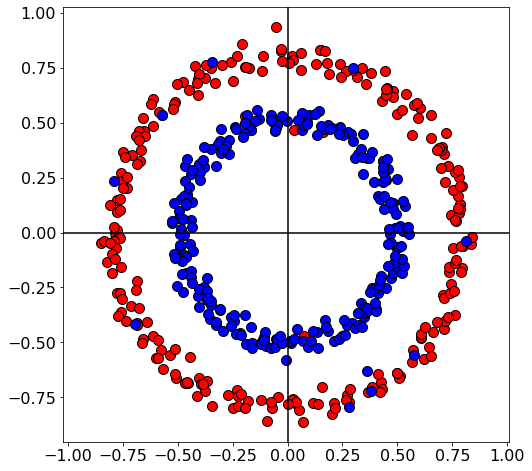

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], s=100, color='r', edgecolor='k')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], s=100, color='b', edgecolor='k')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.axis('equal')
plt.show()

#### Train a kernel SVM with a Guassian kernel (rbf):
$$K\left(\boldsymbol{x}_{i},\boldsymbol{x}_{j}\right)=\exp\left(-\gamma\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}\right)=\exp\left(-\frac{1}{2\sigma^{2}}\left\Vert \boldsymbol{x}_{i}-\boldsymbol{x}_{j}\right\Vert _{2}^{2}\right)$$

In [4]:
from sklearn.svm import SVC

#-- make grid for plot:
v0            = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1            = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1      = np.meshgrid(v0, v1)
XX            = np.c_[XX0.ravel(), XX1.ravel()]

def PlotSVM(σ):
    #-- Train SVM:
    SvmClassifier = SVC(kernel='rbf', gamma=1/σ**2).fit(mX, vY)
    
    #-- Plot classification:
    plt.figure(figsize=(10,10))
    Z = SvmClassifier.predict(XX)
    Z = Z.reshape(XX0.shape)

    plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
    plt.scatter(mX[vIdx0,0], mX[vIdx0,1], color='r')
    plt.scatter(mX[vIdx1,0], mX[vIdx1,1], color='b')
    plt.title('$\sigma = ' + str(σ) + '$')

In [5]:
from ipywidgets   import interact, FloatSlider, Layout

σSlider = FloatSlider(min=0.01, max=5, step=0.01, value=1, layout=Layout(width='80%'))
interact(PlotSVM, σ=σSlider)
plt.show()

interactive(children=(FloatSlider(value=1.0, description='σ', layout=Layout(width='80%'), max=5.0, min=0.01, s…

### Exercise
* Train a kernel SVM (either `poly` or `rbf`) on the breast cancer data: `load_breast_cancer`.
* Use cross validation with 20 folds.
* Find optimal hyper-parameters.
* Can you get better performance than a linear SVM?
* What is your best accuracy (averaging on over the 20 folds)?

In [6]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

#-- Normalize data:
mX    = mX - np.mean(mX, axis=0)
mX    = mX / np.std (mX, axis=0)

vY[vY == 0] = -1

In [9]:
import pandas as pd
from   sklearn.model_selection import cross_val_score, KFold

dRes = pd.DataFrame(columns=['C', 'Accuracy'])

for C in np.linspace(1e-3, 2, 10):
    vAccuracy           = cross_val_score(SVC(C=C, kernel='linear'), mX, vY, cv=KFold(20, shuffle=True))
    dRes.loc[len(dRes)] = [C, np.mean(vAccuracy)]

dRes.sort_values(by='Accuracy', ascending=False)


,C,Accuracy
1,0.223111,0.979002
3,0.667333,0.979002
2,0.445222,0.975554
5,1.111556,0.975431
8,1.777889,0.975431
4,0.889444,0.972167
9,2.000000,0.971921
7,1.555778,0.970074
6,1.333667,0.969951
0,0.001000,0.943781


In [7]:
import pandas as pd
from   sklearn.model_selection import cross_val_score, KFold

dRes = pd.DataFrame(columns=['C', 'P', 'Accuracy'])

for C in np.linspace(.1, 5, 10):
    for P in range(1, 4):
        vAccuracy           = cross_val_score(SVC(C=C, kernel='poly', degree=P), mX, vY, cv=KFold(20, shuffle=True))
        dRes.loc[len(dRes)] = [C, P, np.mean(vAccuracy)]

dRes.sort_values(by='Accuracy', ascending=False)


,C,P,Accuracy
24,4.455556,1.0,0.982389
27,5.000000,1.0,0.979002
12,2.277778,1.0,0.979002
9,1.733333,1.0,0.978695
18,3.366667,1.0,0.977278
6,1.188889,1.0,0.977094
15,2.822222,1.0,0.975369
3,0.644444,1.0,0.971736
21,3.911111,1.0,0.971736
0,0.100000,1.0,0.954187


In [8]:
import pandas as pd
from   sklearn.model_selection import cross_val_score, KFold

dRes = pd.DataFrame(columns=['C', 'σ', 'Accuracy'])

for C in np.linspace(1e-3, 2, 10):
    for σ in np.linspace(3, 6, 10):
        vAccuracy           = cross_val_score(SVC(C=C, kernel='rbf', gamma=1/σ**2), mX, vY, cv=KFold(20, shuffle=True))
        dRes.loc[len(dRes)] = [C, σ, np.mean(vAccuracy)]

dRes.sort_values(by='Accuracy', ascending=False)


,C,σ,Accuracy
63,1.333667,4.000000,0.982574
85,1.777889,4.666667,0.982389
94,2.000000,4.333333,0.982389
46,0.889444,5.000000,0.980727
75,1.555778,4.666667,0.980603
...,...,...,...
6,0.001000,5.000000,0.627340
0,0.001000,3.000000,0.627340
5,0.001000,4.666667,0.627217
7,0.001000,5.333333,0.626970
